### Exercise 07.2

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the Monte Carlo NVT code</span> we have provided: average value of $g(r)$ in each block (with output in the file: output.gofr.0), final average value of $g(r)$ with statistical uncertainties (with output in the file: output.gave.0).

Il programma dell'esercizio 7.1 è stato completato in modo da calcolare ad ogni nuova configurazione ottenuta dalla funzione *Move()* un'istogramma il cui profilo descriva la g(r) della cofigurazione. Ad ogni passo gli istogrammi delle diverse cofigurazioni sono sommati nel vettore *blk_av[ ]* che al termine di ogni blocco viene normalizzato e stampato sul file *output_gofr.dat*. L'istogramma di ciascun blocco viene a sua volta sommato a quello dei blocchi precedenti a disegnare una g(r) media di tutte le configurazioni esplorate, questo viene salvato nel file *output_gave.dat*.

Di seguito riportiamo il grafico della g(r) ottenuta da per ogni blocco: (simulazione dello **stato solido**)

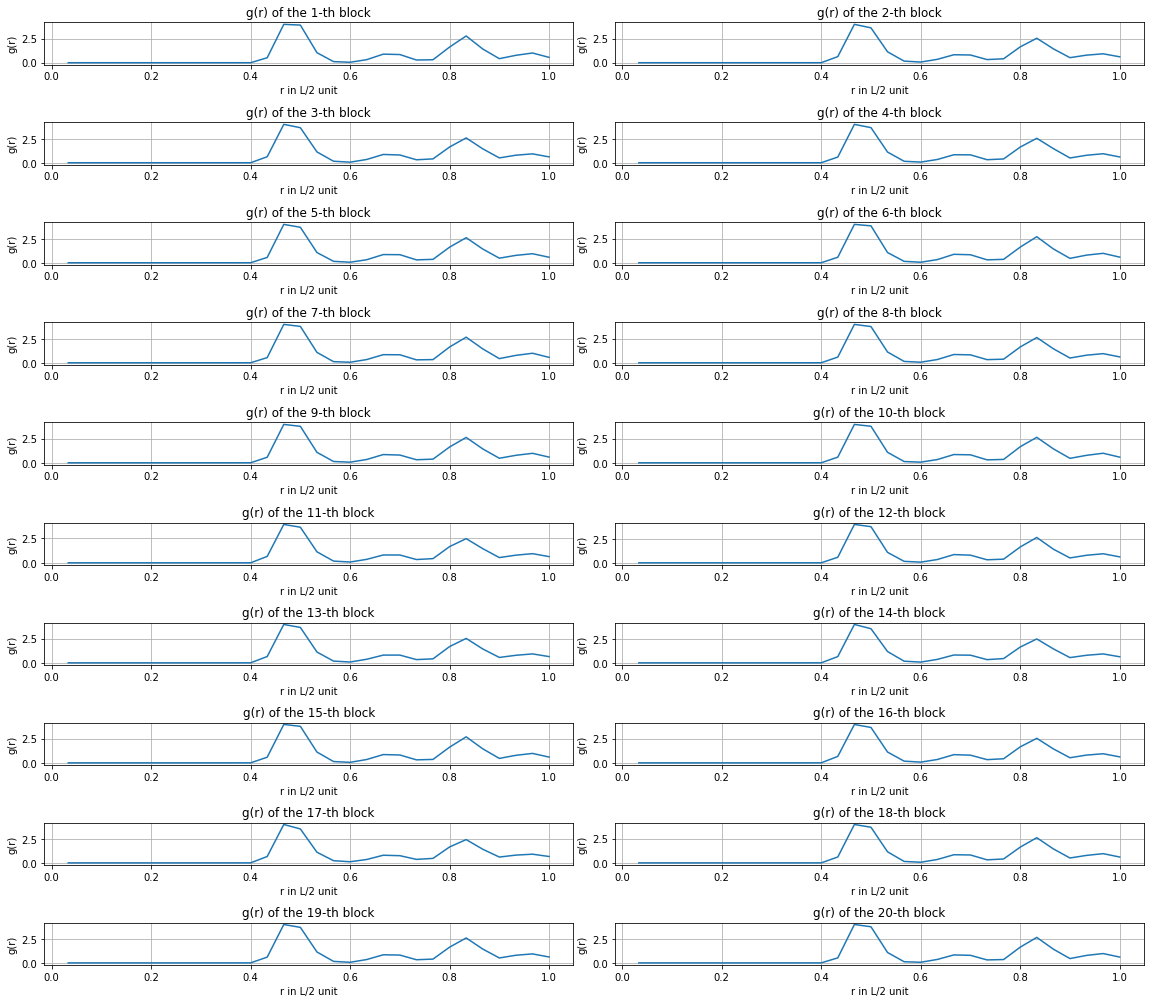

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 15))

nblk=20

data = np.loadtxt('./code/risultati/output_gofr.dat')
datalist = np.split(data,nblk)
for i in range(len(datalist)):
    plt.subplot(nblk/2+1,2,i+1)
    plt.plot(np.arange(1./len(datalist[i]),1.+1./len(datalist[i]),1./len(datalist[i])),datalist [i])
    plt.xlabel("r in L/2 unit")
    plt.ylabel("g(r)")
    plt.title("g(r) of the "+str(i+1)+"-th block")
    plt.grid()
plt.tight_layout()
plt.show()

Il grafico qui sotto invece rappresenta la g(r) ottenuta mediando su tutti i blocchi:

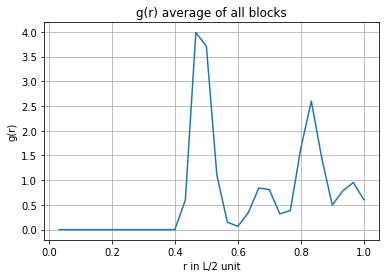

In [8]:
i, data, error = np.loadtxt('./code/risultati/output_gave.dat', usecols=(0,1,2),delimiter='	', unpack='true', skiprows=(nblk-1)*len(datalist[1]))

plt.errorbar(np.arange(1./len(datalist[1]),1.+1./len(datalist[1]),1./len(datalist[1])),data, yerr=error)
plt.title("g(r) average of all blocks")
plt.xlabel("r in L/2 unit")
plt.ylabel("g(r)")
plt.grid()
plt.show()